In [300]:
import pickle
import os

from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
import sklearn
from sklearn import set_config


import xgboost as xgb

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [301]:
set_config(transform_output = "pandas")

In [302]:
df = pd.read_csv(r'C:/Users/Propietario/OneDrive/Escritorio/Capstone-Master-Data-Science/data_dsmarket/preproc_data/full_df.csv')

In [303]:
df = df.rename(columns={col: col.upper() for col in df.columns})

In [304]:
df.head()

,UNNAMED: 0,ID,DATE,ITEM,CATEGORY,DEPARTMENT,STORE_CODE,REGION,STORE,SALES_COUNT,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,SELL_PRICE,REVENUE
0,0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,True,False,False,NaN,NaN
1,1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
2,2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
3,3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN
4,4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,False,False,False,False,NaN,NaN


In [305]:
ORDER_COLUMNS = [
    'DATE',
    'ID',
    'ITEM',
    'ITEM_ID',
    'ITEM_CATEGORY',
    'ITEM_CATEGORY_ID',
    'ITEM_DEPARTMENT',
    'ITEM_DEPARTMENT_ID',
    'STORE_CODE',
    'REGION',
    'REGION_ID',
    'STORE',
    'STORE_ID',
    'SALES_COUNT',
    'SELL_PRICE',
    'REVENUE',
    'EVENT_NEWYEAR',
    'EVENT_NONE',
    'EVENT_SUPERBOWL',
    'EVENT_THANKSGIVING',
    'EVENT_RAMADAN'
]

In [306]:
def preprocess_df(df):
    df.columns = map(str.upper, df.columns)
    df['DATE'] = pd.to_datetime(df["DATE"], format = "%Y-%m-%d")
    
    df["CATEGORY_ID"] = OrdinalEncoder().fit_transform(df[["CATEGORY"]])
    df["DEPARTMENT_ID"] = OrdinalEncoder().fit_transform(df[["DEPARTMENT"]])
    df["REGION_ID"] = OrdinalEncoder().fit_transform(df[["REGION"]])
    df["STORE_ID"] = OrdinalEncoder().fit_transform(df[["STORE"]])
    df["ITEM_ID"] = OrdinalEncoder().fit_transform(df[["ITEM"]])
    
    df.rename(columns = {"CATEGORY":"ITEM_CATEGORY", "CATEGORY_ID":"ITEM_CATEGORY_ID", "DEPARTMENT":"ITEM_DEPARTMENT","DEPARTMENT_ID":"ITEM_DEPARTMENT_ID"}, inplace = True)
    df = df[ORDER_COLUMNS]
    
    return df


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   UNNAMED: 0          int64  
 1   ID                  object 
 2   DATE                object 
 3   ITEM                object 
 4   CATEGORY            object 
 5   DEPARTMENT          object 
 6   STORE_CODE          object 
 7   REGION              object 
 8   STORE               object 
 9   SALES_COUNT         int64  
 10  EVENT_NEWYEAR       bool   
 11  EVENT_NONE          bool   
 12  EVENT_SUPERBOWL     bool   
 13  EVENT_THANKSGIVING  bool   
 14  EVENT_RAMADAN       bool   
 15  SELL_PRICE          float64
 16  REVENUE             float64
dtypes: bool(5), float64(2), int64(2), object(8)
memory usage: 801.8+ MB


In [308]:
df.drop(columns= 'UNNAMED: 0', inplace = True)

In [309]:
df['ID'].nunique()

30490

In [310]:
preprocess_df(df)

,DATE,ID,ITEM,ITEM_ID,ITEM_CATEGORY,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,...,STORE,STORE_ID,SALES_COUNT,SELL_PRICE,REVENUE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,True,False,False
1,2011-02-13,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
2,2011-02-20,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
3,2011-02-27,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
4,2011-03-06,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,...,Greenwich_Village,2.0,0,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323765,2016-03-27,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,17,1.2,20.4,False,False,False,False,False
8323766,2016-04-03,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,22,1.2,26.4,False,False,False,False,False
8323767,2016-04-10,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,8,1.2,9.6,False,False,False,False,False
8323768,2016-04-17,SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,3048.0,SUPERMARKET,2.0,SUPERMARKET_3,6.0,PHI_3,Philadelphia,...,Queen_Village,5.0,0,1.2,0.0,False,False,False,False,False


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ID                  object        
 1   DATE                datetime64[ns]
 2   ITEM                object        
 3   ITEM_CATEGORY       object        
 4   ITEM_DEPARTMENT     object        
 5   STORE_CODE          object        
 6   REGION              object        
 7   STORE               object        
 8   SALES_COUNT         int64         
 9   EVENT_NEWYEAR       bool          
 10  EVENT_NONE          bool          
 11  EVENT_SUPERBOWL     bool          
 12  EVENT_THANKSGIVING  bool          
 13  EVENT_RAMADAN       bool          
 14  SELL_PRICE          float64       
 15  REVENUE             float64       
 16  ITEM_CATEGORY_ID    float64       
 17  ITEM_DEPARTMENT_ID  float64       
 18  REGION_ID           float64       
 19  STORE_ID            float64       
 20  IT

In [312]:
df.head()

,ID,DATE,ITEM,ITEM_CATEGORY,ITEM_DEPARTMENT,STORE_CODE,REGION,STORE,SALES_COUNT,EVENT_NEWYEAR,...,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,SELL_PRICE,REVENUE,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,REGION_ID,STORE_ID,ITEM_ID
0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,True,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0
4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,...,False,False,False,NaN,NaN,0.0,0.0,1.0,2.0,0.0


In [313]:
df['DATE'].value_counts()

2011-02-06    30490
2014-07-20    30490
2014-08-31    30490
2014-08-24    30490
2014-08-17    30490
              ...  
2012-12-16    30490
2012-12-23    30490
2012-12-30    30490
2013-01-06    30490
2016-04-24    30490
Name: DATE, Length: 273, dtype: int64

In [314]:
df['ID'].value_counts()

ACCESORIES_1_001_NYC_1       273
SUPERMARKET_2_202_BOS_3      273
SUPERMARKET_2_214_BOS_3      273
SUPERMARKET_2_213_BOS_3      273
SUPERMARKET_2_212_BOS_3      273
                            ... 
HOME_&_GARDEN_1_457_NYC_4    273
HOME_&_GARDEN_1_456_NYC_4    273
HOME_&_GARDEN_1_455_NYC_4    273
HOME_&_GARDEN_1_454_NYC_4    273
SUPERMARKET_3_827_PHI_3      273
Name: ID, Length: 30490, dtype: int64

Por cada semana tenemos todos los productos

In [315]:
MIN_DATE = df["DATE"].min()
MAX_DATE = df["DATE"].max()

In [316]:
print(f"Min date is {MIN_DATE}\nMax date is {MAX_DATE}")

Min date is 2011-02-06 00:00:00
Max date is 2016-04-24 00:00:00


In [317]:
# df.set_index("DATE").resample("W")["SALES_COUNT"].sum().plot(figsize = (12, 5), title = "Weekly Sales");

In [318]:
df["UNIQUE_DAYS_WITH_SALES"] = df["DATE"]
df["TOTAL_TRANSACTIONS"] = df["SALES_COUNT"]

In [319]:
# df_monthly_agg = df.set_index("DATE").groupby(["ID"]).resample("W").agg(
#     {
#         "SALES_COUNT":np.sum,
#         "REVENUE":np.sum,
#         "UNIQUE_DAYS_WITH_SALES":lambda dates: len(set(dates)),
#         "TOTAL_TRANSACTIONS":len,
#         "SELL_PRICE":np.mean
#     }
# ).rename(
#     columns = {
#         "SALES_COUNT":"WEEKLY_SALES",
#         "REVENUE":"WEEKLY_REVENUE",
#         "SELL_PRICE":"WEEKLY_MEAN_PRICE"
#     }
# ).reset_index()

In [320]:
# df_monthly_agg.to_csv('./data_dsmarket/preproc_data/monthly_agg.csv')

In [321]:
df_monthly_agg = pd.read_csv('./data_dsmarket/preproc_data/monthly_agg.csv')

In [322]:
df_monthly_agg.head()

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE
0,0,ACCESORIES_1_001_BOS_1,2011-02-06,0,0.0,1,1,NaN
1,1,ACCESORIES_1_001_BOS_1,2011-02-13,0,0.0,1,1,NaN
2,2,ACCESORIES_1_001_BOS_1,2011-02-20,0,0.0,1,1,NaN
3,3,ACCESORIES_1_001_BOS_1,2011-02-27,0,0.0,1,1,NaN
4,4,ACCESORIES_1_001_BOS_1,2011-03-06,0,0.0,1,1,NaN


In [323]:
df_monthly_agg[df_monthly_agg['DATE'] == '2011-10-09']

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE
35,35,ACCESORIES_1_001_BOS_1,2011-10-09,0,0.0,1,1,NaN
308,308,ACCESORIES_1_001_BOS_2,2011-10-09,0,0.0,1,1,NaN
581,581,ACCESORIES_1_001_BOS_3,2011-10-09,0,0.0,1,1,NaN
854,854,ACCESORIES_1_001_NYC_1,2011-10-09,0,0.0,1,1,NaN
1127,1127,ACCESORIES_1_001_NYC_2,2011-10-09,0,0.0,1,1,NaN
...,...,...,...,...,...,...,...,...
8322440,8322440,SUPERMARKET_3_827_NYC_3,2011-10-09,0,0.0,1,1,NaN
8322713,8322713,SUPERMARKET_3_827_NYC_4,2011-10-09,0,0.0,1,1,NaN
8322986,8322986,SUPERMARKET_3_827_PHI_1,2011-10-09,0,0.0,1,1,NaN
8323259,8323259,SUPERMARKET_3_827_PHI_2,2011-10-09,0,0.0,1,1,NaN


En cada fecha tenemos registrados TODOS los productos

In [324]:
df_monthly_agg[(df_monthly_agg['DATE'] == '2011-10-09') & (df_monthly_agg['WEEKLY_SALES'] > 0)]

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE
2765,2765,ACCESORIES_1_002_BOS_1,2011-10-09,1,5.2801,1,1,5.2801
3038,3038,ACCESORIES_1_002_BOS_2,2011-10-09,1,5.2801,1,1,5.2801
3584,3584,ACCESORIES_1_002_NYC_1,2011-10-09,2,10.5602,1,1,5.2801
3857,3857,ACCESORIES_1_002_NYC_2,2011-10-09,1,5.2801,1,1,5.2801
4676,4676,ACCESORIES_1_002_PHI_1,2011-10-09,2,10.5602,1,1,5.2801
...,...,...,...,...,...,...,...,...
8316707,8316707,SUPERMARKET_3_825_NYC_2,2011-10-09,2,9.5520,1,1,4.7760
8316980,8316980,SUPERMARKET_3_825_NYC_3,2011-10-09,5,26.2800,1,1,5.2560
8317253,8317253,SUPERMARKET_3_825_NYC_4,2011-10-09,9,47.3040,1,1,5.2560
8317526,8317526,SUPERMARKET_3_825_PHI_1,2011-10-09,2,10.5120,1,1,5.2560


In [325]:
df_monthly_agg["CHECK"] = df_monthly_agg["UNIQUE_DAYS_WITH_SALES"] == df_monthly_agg["TOTAL_TRANSACTIONS"]

In [326]:
df_monthly_agg[df_monthly_agg["CHECK"] == True].sample(5)

,Unnamed: 0,ID,DATE,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,CHECK
4697213,4697213,SUPERMARKET_1_111_NYC_3,2015-11-08,10,71.7600,1,1,7.1760,True
2736539,2736539,HOME_&_GARDEN_1_447_NYC_1,2016-01-31,57,69.1125,1,1,1.2125,True
6991514,6991514,SUPERMARKET_3_336_PHI_3,2016-01-10,0,0.0000,1,1,3.2160,True
7223820,7223820,SUPERMARKET_3_422_BOS_1,2015-09-13,0,0.0000,1,1,2.3040,True
1308922,1308922,ACCESORIES_2_064_NYC_2,2014-03-02,0,0.0000,1,1,1.2901,True


Como tenemos todos los productos por todas las fechas, el check no nos permite ver los dias con mas de una venta por producto

In [327]:
check_months = df_monthly_agg.groupby("ID").size()
check_months.sample(3)

ID
HOME_&_GARDEN_1_073_BOS_3    273
HOME_&_GARDEN_1_441_PHI_2    273
HOME_&_GARDEN_2_359_PHI_1    273
dtype: int64

In [328]:
check_months[check_months != 273].shape

(0,)

In [329]:
DATE_PREDICTION = np.datetime64("2016-04-24")
date_range = pd.date_range(MIN_DATE, DATE_PREDICTION, freq = "W")
date_range

DatetimeIndex(['2011-02-06', '2011-02-13', '2011-02-20', '2011-02-27',
               '2011-03-06', '2011-03-13', '2011-03-20', '2011-03-27',
               '2011-04-03', '2011-04-10',
               ...
               '2016-02-21', '2016-02-28', '2016-03-06', '2016-03-13',
               '2016-03-20', '2016-03-27', '2016-04-03', '2016-04-10',
               '2016-04-17', '2016-04-24'],
              dtype='datetime64[ns]', length=273, freq='W-SUN')

In [330]:
date_range.value_counts()

2011-02-06    1
2014-07-20    1
2014-08-31    1
2014-08-24    1
2014-08-17    1
             ..
2012-12-16    1
2012-12-23    1
2012-12-30    1
2013-01-06    1
2016-04-24    1
Length: 273, dtype: int64

In [331]:
unique_id = sorted(df_monthly_agg["ID"].unique())
unique_id[:3]

['ACCESORIES_1_001_BOS_1', 'ACCESORIES_1_001_BOS_2', 'ACCESORIES_1_001_BOS_3']

In [332]:
len(unique_id)

30490

In [333]:
cartesian_product = pd.MultiIndex.from_product([date_range, unique_id], names = ["DATE", "ID"])
len(cartesian_product)

8323770

In [334]:
30490 * 278

8476220

In [335]:
events = ['DATE']
for col in df.columns:
    if df[col].dtype == 'bool':
        events.append(col)

not_events = df.columns[~df.columns.isin(events)]

df_month = df[not_events]
events_df = df[events]

In [336]:
events_df

,DATE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,False,False,True,False,False
1,2011-02-13,False,False,False,False,False
2,2011-02-20,False,False,False,False,False
3,2011-02-27,False,False,False,False,False
4,2011-03-06,False,False,False,False,False
...,...,...,...,...,...,...
8323765,2016-03-27,False,False,False,False,False
8323766,2016-04-03,False,False,False,False,False
8323767,2016-04-10,False,False,False,False,False
8323768,2016-04-17,False,False,False,False,False


In [337]:
df_monthly_agg['DATE'] = pd.to_datetime(df_monthly_agg['DATE'], format = "%Y-%m-%d")

In [338]:
full_df = pd.DataFrame(index = cartesian_product).reset_index()

print(full_df.shape)

full_df = full_df.merge(df_monthly_agg, on = ['DATE','ID'], how = 'left')

print(full_df.shape)

(8323770, 2)
(8323770, 9)


In [339]:
events_df

,DATE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,False,False,True,False,False
1,2011-02-13,False,False,False,False,False
2,2011-02-20,False,False,False,False,False
3,2011-02-27,False,False,False,False,False
4,2011-03-06,False,False,False,False,False
...,...,...,...,...,...,...
8323765,2016-03-27,False,False,False,False,False
8323766,2016-04-03,False,False,False,False,False
8323767,2016-04-10,False,False,False,False,False
8323768,2016-04-17,False,False,False,False,False


In [340]:
events_df.drop_duplicates(inplace=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_14488\3921119319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df.drop_duplicates(inplace=True)


In [341]:
events_df

,DATE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,False,False,True,False,False
1,2011-02-13,False,False,False,False,False
2,2011-02-20,False,False,False,False,False
3,2011-02-27,False,False,False,False,False
4,2011-03-06,False,False,False,False,False
...,...,...,...,...,...,...
268,2016-03-27,False,False,False,False,False
269,2016-04-03,False,False,False,False,False
270,2016-04-10,False,False,False,False,False
271,2016-04-17,False,False,False,False,False


In [342]:
full_df = full_df.merge(events_df, on = ['DATE'], how = 'left')

In [343]:
full_df.shape

(8323770, 14)

In [344]:
full_df.sample(5)

,DATE,ID,Unnamed: 0,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,CHECK,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
2573896,2012-09-16,HOME_&_GARDEN_2_177_NYC_4,3477012,0,0.00,1,1,NaN,True,False,False,False,False,False
6798619,2015-05-10,SUPERMARKET_3_762_PHI_3,8146269,0,0.00,1,1,4.416,True,False,False,False,False,False
7586675,2015-11-08,SUPERMARKET_3_291_NYC_3,6867563,20,66.72,1,1,3.336,True,False,False,False,False,False
7132865,2015-07-26,SUPERMARKET_3_645_NYC_3,7833968,6,18.00,1,1,3.000,True,False,False,False,False,False
4104802,2013-09-01,SUPERMARKET_2_087_BOS_3,5225900,5,58.02,1,1,11.604,True,False,False,False,False,False


In [345]:
add_info = df[
    ["ID", "ITEM", "ITEM_ID", "ITEM_CATEGORY", "ITEM_CATEGORY_ID", "ITEM_DEPARTMENT", "ITEM_DEPARTMENT_ID", "STORE_CODE",
     "REGION", "REGION_ID", "STORE", "STORE_ID"]
].drop_duplicates()

add_info.head(3)

,ID,ITEM,ITEM_ID,ITEM_CATEGORY,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0
273,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,1.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0
546,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,2.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0


In [346]:
add_info.shape

(30490, 12)

Si ponemos eventos da el numero correcto de unique ID, se crean columnas diferentes i extras debido a estos, asi que por ahora eliminamos eventos 
, "EVENT_NEWYEAR", "EVENT_NONE", "EVENT_SUPERBOWL", "EVENT_THANKSGIVING", "EVENT_RAMADAN"

In [347]:
full_df

,DATE,ID,Unnamed: 0,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,CHECK,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN
0,2011-02-06,ACCESORIES_1_001_BOS_1,0,0,0.0,1,1,NaN,True,False,False,True,False,False
1,2011-02-06,ACCESORIES_1_001_BOS_2,273,0,0.0,1,1,NaN,True,False,False,True,False,False
2,2011-02-06,ACCESORIES_1_001_BOS_3,546,0,0.0,1,1,NaN,True,False,False,True,False,False
3,2011-02-06,ACCESORIES_1_001_NYC_1,819,0,0.0,1,1,NaN,True,False,False,True,False,False
4,2011-02-06,ACCESORIES_1_001_NYC_2,1092,0,0.0,1,1,NaN,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323765,2016-04-24,SUPERMARKET_3_827_NYC_3,8322677,38,45.6,1,1,1.2,True,False,False,False,False,False
8323766,2016-04-24,SUPERMARKET_3_827_NYC_4,8322950,22,26.4,1,1,1.2,True,False,False,False,False,False
8323767,2016-04-24,SUPERMARKET_3_827_PHI_1,8323223,15,18.0,1,1,1.2,True,False,False,False,False,False
8323768,2016-04-24,SUPERMARKET_3_827_PHI_2,8323496,12,14.4,1,1,1.2,True,False,False,False,False,False


In [348]:
print(full_df.shape)

full_df = full_df.merge(add_info, how = "left", on = "ID")

print(full_df.shape)

(8323770, 14)
(8323770, 25)


In [349]:
full_df.drop(["CHECK", 'Unnamed: 0'], axis = 1, inplace = True)

In [350]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8323770 entries, 0 to 8323769
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   DATE                    datetime64[ns]
 1   ID                      object        
 2   WEEKLY_SALES            int64         
 3   WEEKLY_REVENUE          float64       
 4   UNIQUE_DAYS_WITH_SALES  int64         
 5   TOTAL_TRANSACTIONS      int64         
 6   WEEKLY_MEAN_PRICE       float64       
 7   EVENT_NEWYEAR           bool          
 8   EVENT_NONE              bool          
 9   EVENT_SUPERBOWL         bool          
 10  EVENT_THANKSGIVING      bool          
 11  EVENT_RAMADAN           bool          
 12  ITEM                    object        
 13  ITEM_ID                 float64       
 14  ITEM_CATEGORY           object        
 15  ITEM_CATEGORY_ID        float64       
 16  ITEM_DEPARTMENT         object        
 17  ITEM_DEPARTMENT_ID      float64       
 18  ST

In [351]:
full_df.isnull().sum()

DATE                            0
ID                              0
WEEKLY_SALES                    0
WEEKLY_REVENUE                  0
UNIQUE_DAYS_WITH_SALES          0
TOTAL_TRANSACTIONS              0
WEEKLY_MEAN_PRICE         1757059
EVENT_NEWYEAR                   0
EVENT_NONE                      0
EVENT_SUPERBOWL                 0
EVENT_THANKSGIVING              0
EVENT_RAMADAN                   0
ITEM                            0
ITEM_ID                         0
ITEM_CATEGORY                   0
ITEM_CATEGORY_ID                0
ITEM_DEPARTMENT                 0
ITEM_DEPARTMENT_ID              0
STORE_CODE                      0
REGION                          0
REGION_ID                       0
STORE                           0
STORE_ID                        0
dtype: int64

In [352]:
full_df["WEEKLY_SALES"].fillna(0, inplace = True)
full_df["WEEKLY_REVENUE"].fillna(0, inplace = True)
full_df["UNIQUE_DAYS_WITH_SALES"].fillna(0, inplace = True)
full_df["TOTAL_TRANSACTIONS"].fillna(0, inplace = True)

In [353]:
full_df.isnull().sum()

DATE                            0
ID                              0
WEEKLY_SALES                    0
WEEKLY_REVENUE                  0
UNIQUE_DAYS_WITH_SALES          0
TOTAL_TRANSACTIONS              0
WEEKLY_MEAN_PRICE         1757059
EVENT_NEWYEAR                   0
EVENT_NONE                      0
EVENT_SUPERBOWL                 0
EVENT_THANKSGIVING              0
EVENT_RAMADAN                   0
ITEM                            0
ITEM_ID                         0
ITEM_CATEGORY                   0
ITEM_CATEGORY_ID                0
ITEM_DEPARTMENT                 0
ITEM_DEPARTMENT_ID              0
STORE_CODE                      0
REGION                          0
REGION_ID                       0
STORE                           0
STORE_ID                        0
dtype: int64

In [354]:
full_df.head()

,DATE,ID,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,...,ITEM_ID,ITEM_CATEGORY,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID
0,2011-02-06,ACCESORIES_1_001_BOS_1,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,BOS_1,Boston,0.0,South_End,7.0
1,2011-02-06,ACCESORIES_1_001_BOS_2,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,BOS_2,Boston,0.0,Roxbury,6.0
2,2011-02-06,ACCESORIES_1_001_BOS_3,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,BOS_3,Boston,0.0,Back_Bay,0.0
3,2011-02-06,ACCESORIES_1_001_NYC_1,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0
4,2011-02-06,ACCESORIES_1_001_NYC_2,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES,0.0,ACCESORIES_1,0.0,NYC_2,New York,1.0,Harlem,3.0


In [355]:
full_df['MONTH'] = full_df['DATE'].dt.month
full_df['DAY'] = full_df['DATE'].dt.day

In [356]:
events.remove('DATE')

In [357]:
events.remove('EVENT_NONE')

In [358]:
events

['EVENT_NEWYEAR', 'EVENT_SUPERBOWL', 'EVENT_THANKSGIVING', 'EVENT_RAMADAN']

In [359]:
full_df['EVENT_NONE'].fillna(True, inplace=True)

In [360]:
for event in events:
    full_df[event].fillna(False, inplace=True)

In [361]:
full_df

,DATE,ID,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,...,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID,MONTH,DAY
0,2011-02-06,ACCESORIES_1_001_BOS_1,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_1,Boston,0.0,South_End,7.0,2,6
1,2011-02-06,ACCESORIES_1_001_BOS_2,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_2,Boston,0.0,Roxbury,6.0,2,6
2,2011-02-06,ACCESORIES_1_001_BOS_3,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_3,Boston,0.0,Back_Bay,0.0,2,6
3,2011-02-06,ACCESORIES_1_001_NYC_1,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0,2,6
4,2011-02-06,ACCESORIES_1_001_NYC_2,0,0.0,1,1,NaN,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_2,New York,1.0,Harlem,3.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8323765,2016-04-24,SUPERMARKET_3_827_NYC_3,38,45.6,1,1,1.2,False,False,False,...,2.0,SUPERMARKET_3,6.0,NYC_3,New York,1.0,Tribeca,8.0,4,24
8323766,2016-04-24,SUPERMARKET_3_827_NYC_4,22,26.4,1,1,1.2,False,False,False,...,2.0,SUPERMARKET_3,6.0,NYC_4,New York,1.0,Brooklyn,1.0,4,24
8323767,2016-04-24,SUPERMARKET_3_827_PHI_1,15,18.0,1,1,1.2,False,False,False,...,2.0,SUPERMARKET_3,6.0,PHI_1,Philadelphia,2.0,Midtown_Village,4.0,4,24
8323768,2016-04-24,SUPERMARKET_3_827_PHI_2,12,14.4,1,1,1.2,False,False,False,...,2.0,SUPERMARKET_3,6.0,PHI_2,Philadelphia,2.0,Yorktown,9.0,4,24


In [362]:
sample_series = full_df[full_df["ID"] == "ACCESORIES_1_001_NYC_1"][["DATE", "ID", "WEEKLY_MEAN_PRICE"]]
sample_series

,DATE,ID,WEEKLY_MEAN_PRICE
3,2011-02-06,ACCESORIES_1_001_NYC_1,NaN
30493,2011-02-13,ACCESORIES_1_001_NYC_1,NaN
60983,2011-02-20,ACCESORIES_1_001_NYC_1,NaN
91473,2011-02-27,ACCESORIES_1_001_NYC_1,NaN
121963,2011-03-06,ACCESORIES_1_001_NYC_1,NaN
...,...,...,...
8171323,2016-03-27,ACCESORIES_1_001_NYC_1,10.9858
8201813,2016-04-03,ACCESORIES_1_001_NYC_1,10.9858
8232303,2016-04-10,ACCESORIES_1_001_NYC_1,10.9858
8262793,2016-04-17,ACCESORIES_1_001_NYC_1,11.1454


In [363]:
full_df["WEEKLY_MEAN_PRICE"] = full_df.groupby("ID")["WEEKLY_MEAN_PRICE"].apply(
    lambda series: series.backfill().ffill()
)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_14488\2052045608.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  full_df["WEEKLY_MEAN_PRICE"] = full_df.groupby("ID")["WEEKLY_MEAN_PRICE"].apply(


Los nulos que nos aparecen los tenemos por el mes que hemos añadido. Como nos sale este error de momento los imputampos por 0

In [364]:
full_df["WEEKLY_MEAN_PRICE"].isnull().sum()

0

In [365]:
del df, cartesian_product, unique_id, date_range, add_info, sample_series, check_months

In [366]:
def plot_ts_acf_pacf(y, title):
    '''
    Plots the ts you pass and the acf and pacf.
    '''
    fig = plt.figure(figsize = (12, 10))
    ax1, ax2, ax3 = fig.subplots(3, 1)

    ax1.plot(y)
    plot_acf(x = y, ax = ax2)
    plot_pacf(x = y, ax = ax3)

    plt.suptitle(t = title, fontsize = 20)

In [367]:
y = full_df.set_index("DATE").resample("W")["WEEKLY_SALES"].sum()

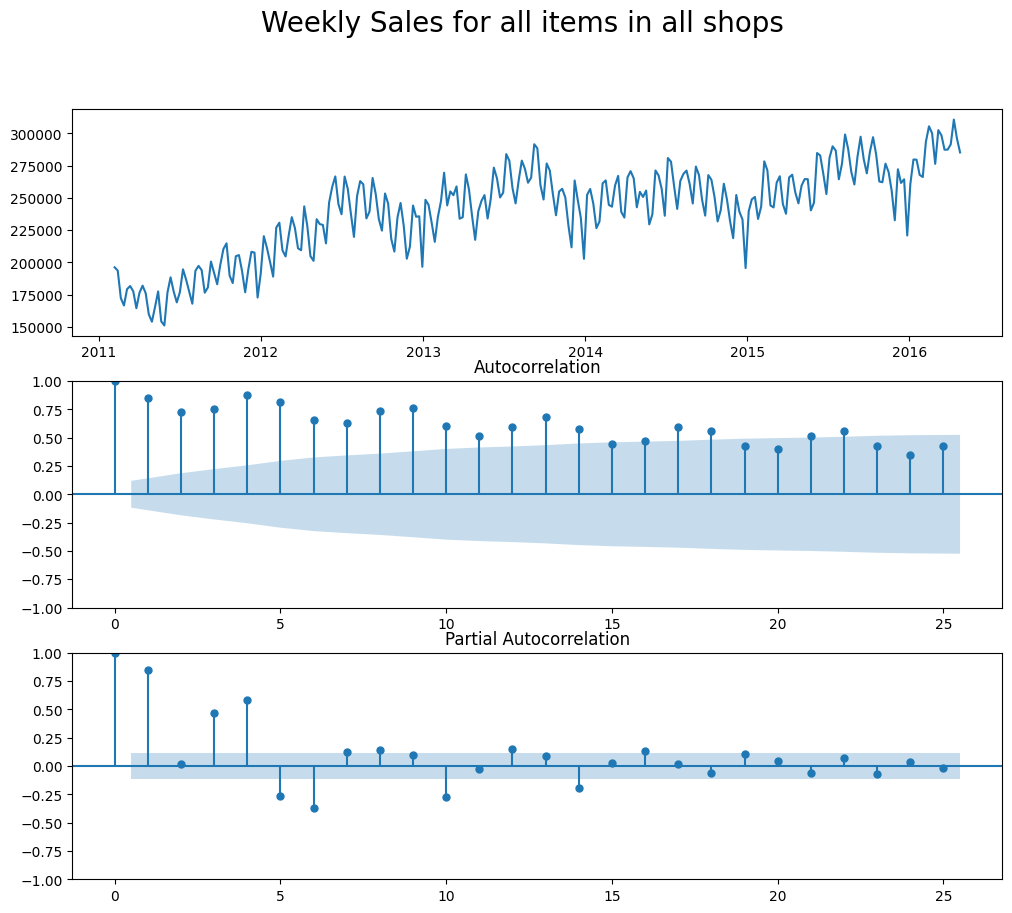

In [368]:
plot_ts_acf_pacf(y = y, title = "Weekly Sales for all items in all shops");

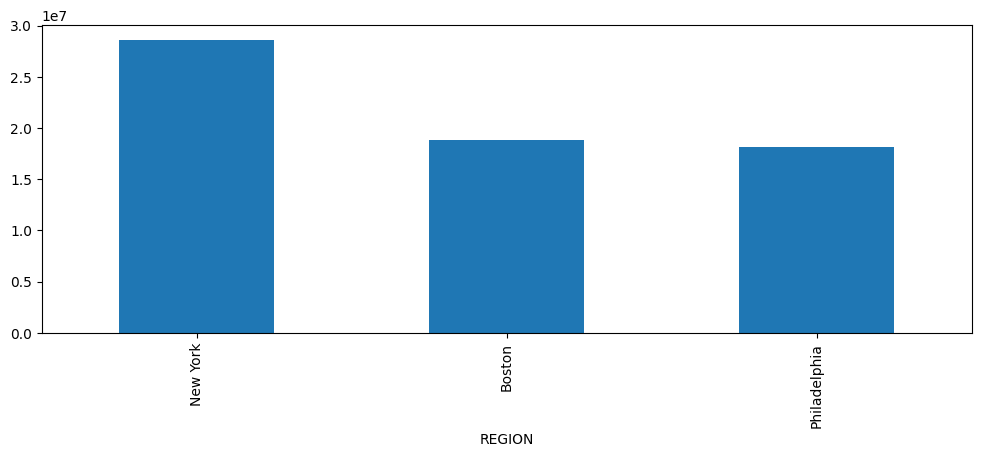

In [369]:
(
    full_df.
    groupby(["REGION"])
    ["WEEKLY_SALES"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

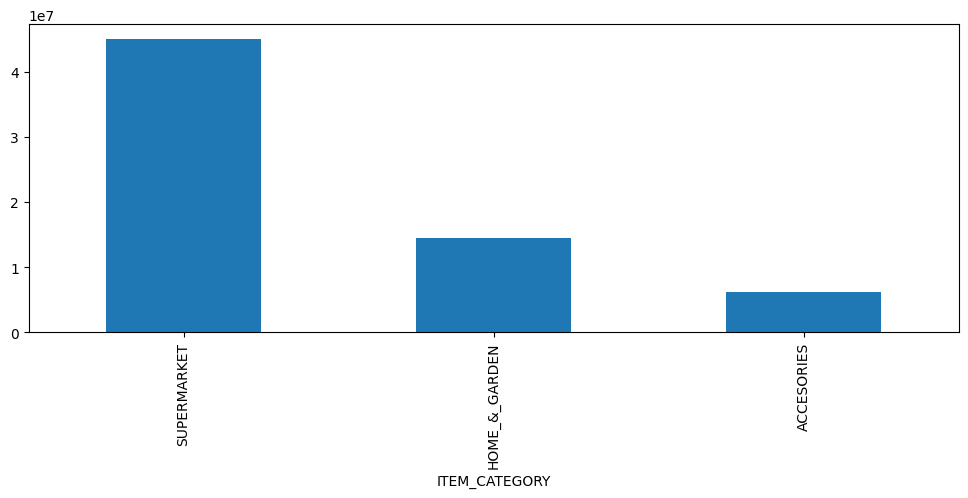

In [370]:
(
    full_df.
    groupby(["ITEM_CATEGORY"])
    ["WEEKLY_SALES"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

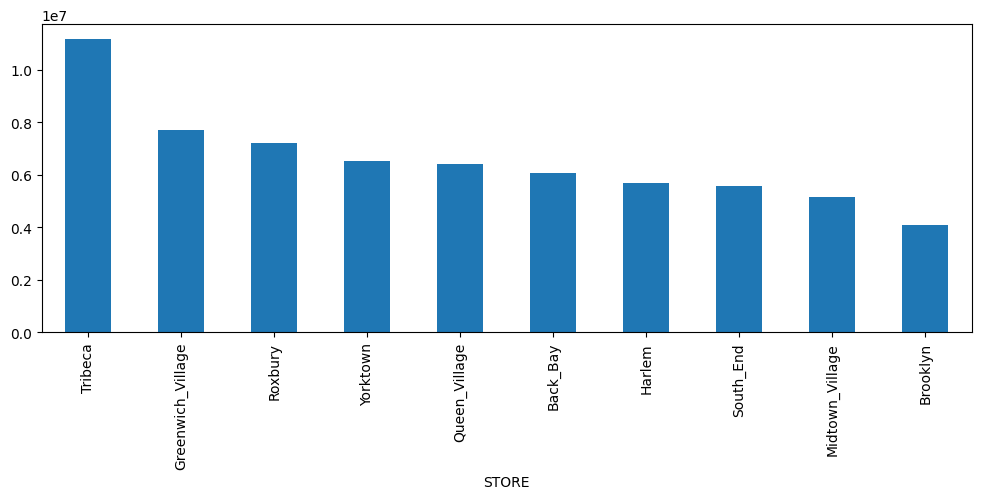

In [371]:
(
    full_df.
    groupby(["STORE"])
    ["WEEKLY_SALES"].sum()
    .sort_values(ascending = False)
    .plot(kind = "bar", figsize = (12, 4))
);

In [372]:
full_df.head()

,DATE,ID,WEEKLY_SALES,WEEKLY_REVENUE,UNIQUE_DAYS_WITH_SALES,TOTAL_TRANSACTIONS,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,...,ITEM_CATEGORY_ID,ITEM_DEPARTMENT,ITEM_DEPARTMENT_ID,STORE_CODE,REGION,REGION_ID,STORE,STORE_ID,MONTH,DAY
0,2011-02-06,ACCESORIES_1_001_BOS_1,0,0.0,1,1,12.7414,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_1,Boston,0.0,South_End,7.0,2,6
1,2011-02-06,ACCESORIES_1_001_BOS_2,0,0.0,1,1,12.7414,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_2,Boston,0.0,Roxbury,6.0,2,6
2,2011-02-06,ACCESORIES_1_001_BOS_3,0,0.0,1,1,11.4646,False,False,True,...,0.0,ACCESORIES_1,0.0,BOS_3,Boston,0.0,Back_Bay,0.0,2,6
3,2011-02-06,ACCESORIES_1_001_NYC_1,0,0.0,1,1,12.7414,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_1,New York,1.0,Greenwich_Village,2.0,2,6
4,2011-02-06,ACCESORIES_1_001_NYC_2,0,0.0,1,1,10.9858,False,False,True,...,0.0,ACCESORIES_1,0.0,NYC_2,New York,1.0,Harlem,3.0,2,6


In [373]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8323770 entries, 0 to 8323769
Data columns (total 25 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   DATE                    datetime64[ns]
 1   ID                      object        
 2   WEEKLY_SALES            int64         
 3   WEEKLY_REVENUE          float64       
 4   UNIQUE_DAYS_WITH_SALES  int64         
 5   TOTAL_TRANSACTIONS      int64         
 6   WEEKLY_MEAN_PRICE       float64       
 7   EVENT_NEWYEAR           bool          
 8   EVENT_NONE              bool          
 9   EVENT_SUPERBOWL         bool          
 10  EVENT_THANKSGIVING      bool          
 11  EVENT_RAMADAN           bool          
 12  ITEM                    object        
 13  ITEM_ID                 float64       
 14  ITEM_CATEGORY           object        
 15  ITEM_CATEGORY_ID        float64       
 16  ITEM_DEPARTMENT         object        
 17  ITEM_DEPARTMENT_ID      float64       
 18  ST

In [374]:
full_df['WEEKLY_SALES'].describe()

count    8.323770e+06
mean     7.884772e+00
std      2.371291e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      7.000000e+00
max      3.976000e+03
Name: WEEKLY_SALES, dtype: float64

In [375]:
full_df["WEEKLY_SALES"] = np.clip(full_df["WEEKLY_SALES"], 0, 15)

In [376]:
def build_ts_vars(full_df, gb_list, target_column, agg_func, agg_func_name, num_of_lags=1, rolling = False, window = 3, verbose = True):
    
    assert gb_list[0] == "DATE", "First element must be date"
    
    new_name = "_".join(gb_list + [target_column] + [agg_func_name])
    
    if verbose: print(new_name)

    gb_df_ = full_df.groupby(gb_list)[target_column].apply(agg_func).to_frame().reset_index().rename(
        columns = {
            target_column : new_name
        }
    )
    if rolling:
        gb_df_[f"{new_name}_MA"+f"{window}"] = gb_df_.groupby(gb_list[1:])[new_name].transform(
        lambda series: series.shift(1).rolling(window = window).mean()
    )
    else:    
        gb_df_[f"{new_name}_LAG{num_of_lags}"] = gb_df_.groupby(gb_list[1:])[new_name].transform(
                lambda series: series.shift(num_of_lags)
        )
    gb_df_.drop(new_name, axis=1, inplace=True)
    return gb_df_

In [377]:
GB_LIST_STORE_ID = ["DATE", "STORE_ID"]
TARGET_COLUMN = "WEEKLY_SALES"
AGG_FUNC = np.mean
AGG_FUNC_NAME = "MEAN"

week_sales_mean_ma = build_ts_vars(
    full_df = full_df,
    gb_list = GB_LIST_STORE_ID,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME,
    rolling = True
)

week_sales_mean_ma.sample(10)

DATE_STORE_ID_WEEKLY_SALES_MEAN


,DATE,STORE_ID,DATE_STORE_ID_WEEKLY_SALES_MEAN_MA3
237,2011-07-17,7.0,2.775883
354,2011-10-09,4.0,2.450202
1586,2014-02-16,6.0,4.334427
1017,2013-01-13,7.0,3.367334
991,2012-12-30,1.0,3.200503
681,2012-05-27,1.0,3.116541
1908,2014-09-28,8.0,6.895704
1207,2013-05-26,7.0,3.865202
1720,2014-05-25,0.0,4.475456
2515,2015-11-29,5.0,4.751175


In [378]:
GB_LIST_STORE_ID = ["DATE", "STORE_ID"]
TARGET_COLUMN = "WEEKLY_SALES"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "SUM"

week_sales_sum_ma = build_ts_vars(
    full_df = full_df,
    gb_list = GB_LIST_STORE_ID,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME,
)

week_sales_sum_ma.sample(10)

DATE_STORE_ID_WEEKLY_SALES_SUM


,DATE,STORE_ID,DATE_STORE_ID_WEEKLY_SALES_SUM_LAG1
8,2011-02-06,8.0,NaN
2660,2016-03-13,0.0,16228.0
1674,2014-04-20,4.0,15072.0
196,2011-06-19,6.0,10905.0
423,2011-11-27,3.0,10220.0
1624,2014-03-16,4.0,14649.0
187,2011-06-12,7.0,8888.0
2259,2015-05-31,9.0,14215.0
1951,2014-11-02,1.0,12374.0
1721,2014-05-25,1.0,11793.0


In [379]:
GB_LIST_REGION_ID = ["DATE", "REGION_ID"]
TARGET_COLUMN = "WEEKLY_SALES"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "SUM"

week_sales_region_sum_ma = build_ts_vars(
    full_df = full_df,
    gb_list = GB_LIST_REGION_ID,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME,
)

week_sales_region_sum_ma.sample(10)

DATE_REGION_ID_WEEKLY_SALES_SUM


,DATE,REGION_ID,DATE_REGION_ID_WEEKLY_SALES_SUM_LAG1
365,2013-06-02,2.0,35120.0
217,2012-06-24,1.0,51300.0
584,2014-10-26,2.0,44028.0
515,2014-05-18,2.0,40468.0
76,2011-07-31,1.0,41027.0
137,2011-12-18,2.0,25849.0
341,2013-04-07,2.0,36285.0
795,2016-03-06,0.0,45629.0
37,2011-05-01,1.0,39532.0
130,2011-12-04,1.0,40861.0


In [380]:
GB_LIST_CAT_ID = ["DATE", "ITEM_CATEGORY_ID"]
TARGET_COLUMN = "WEEKLY_SALES"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "SUM"

week_sales_cat_sum = build_ts_vars(
    full_df = full_df,
    gb_list = GB_LIST_CAT_ID,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME
)

week_sales_cat_sum.sample(10)

DATE_ITEM_CATEGORY_ID_WEEKLY_SALES_SUM


,DATE,ITEM_CATEGORY_ID,DATE_ITEM_CATEGORY_ID_WEEKLY_SALES_SUM_LAG1
685,2015-06-21,1.0,45951.0
529,2014-06-22,1.0,39076.0
161,2012-02-12,2.0,68827.0
593,2014-11-16,2.0,92378.0
20,2011-03-20,2.0,56789.0
795,2016-03-06,0.0,20381.0
556,2014-08-24,1.0,43317.0
75,2011-07-31,0.0,12676.0
771,2016-01-10,0.0,19126.0
344,2013-04-14,2.0,78519.0


In [381]:
rows_before_merge = full_df.shape[0]
print(f"Shape before merge is {rows_before_merge}")

full_df = pd.merge(full_df, week_sales_mean_ma, on = GB_LIST_STORE_ID, how = "left")
full_df = pd.merge(full_df, week_sales_sum_ma, on = GB_LIST_STORE_ID, how = "left")
full_df = pd.merge(full_df, week_sales_region_sum_ma, on = GB_LIST_REGION_ID, how = "left")
full_df = pd.merge(full_df, week_sales_cat_sum, on = GB_LIST_CAT_ID, how = "left")

rows_after_merge = full_df.shape[0]

print(f"Shape after merge is {rows_after_merge}")

assert rows_before_merge == rows_after_merge, "You have generated a cartesian product!"

Shape before merge is 8323770
Shape after merge is 8323770


In [382]:
COLUMNS_TO_DROP = [
    'WEEKLY_REVENUE',
    'UNIQUE_DAYS_WITH_SALES',
    'TOTAL_TRANSACTIONS',
    'ITEM',
    'ITEM_CATEGORY',
    'ITEM_DEPARTMENT',
    'REGION',
    'STORE',
]

full_df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)

In [383]:
full_df.set_index("ID", inplace = True)

In [384]:
full_df.sample(5)

,DATE,WEEKLY_SALES,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,ITEM_ID,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,STORE_CODE,REGION_ID,STORE_ID,MONTH,DAY,DATE_STORE_ID_WEEKLY_SALES_MEAN_MA3,DATE_STORE_ID_WEEKLY_SALES_SUM_LAG1,DATE_REGION_ID_WEEKLY_SALES_SUM_LAG1,DATE_ITEM_CATEGORY_ID_WEEKLY_SALES_SUM_LAG1
ID,,,,,,,,,,,,,,,,,,,,
HOME_&_GARDEN_1_294_NYC_1,2011-03-06,15,2.4625,False,False,False,False,False,852.0,1.0,2.0,NYC_1,1.0,2.0,3,6,3.544331,10675.0,39308.0,24114.0
SUPERMARKET_3_564_BOS_1,2014-09-28,0,2.0880,False,False,False,False,False,2788.0,2.0,6.0,BOS_1,0.0,7.0,9,28,4.312889,13052.0,41240.0,88230.0
ACCESORIES_1_152_NYC_4,2011-05-01,0,7.3150,False,False,False,False,False,147.0,0.0,0.0,NYC_4,1.0,1.0,5,1,2.460042,7441.0,39532.0,11930.0
HOME_&_GARDEN_2_486_BOS_1,2014-10-05,2,7.4625,False,False,False,False,False,1581.0,1.0,3.0,BOS_1,0.0,7.0,10,5,4.245764,12274.0,39751.0,40599.0
HOME_&_GARDEN_1_411_BOS_1,2015-08-30,8,4.1000,False,False,False,False,False,966.0,1.0,2.0,BOS_1,0.0,7.0,8,30,4.665573,13465.0,43826.0,48867.0


In [385]:
full_df.drop('STORE_CODE', inplace = True, axis = 1)

In [386]:
full_df.sample(5)

,DATE,WEEKLY_SALES,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,ITEM_ID,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,REGION_ID,STORE_ID,MONTH,DAY,DATE_STORE_ID_WEEKLY_SALES_MEAN_MA3,DATE_STORE_ID_WEEKLY_SALES_SUM_LAG1,DATE_REGION_ID_WEEKLY_SALES_SUM_LAG1,DATE_ITEM_CATEGORY_ID_WEEKLY_SALES_SUM_LAG1
ID,,,,,,,,,,,,,,,,,,,
HOME_&_GARDEN_1_364_NYC_3,2013-06-09,9,9.825,False,False,False,False,False,921.0,1.0,2.0,1.0,8.0,6,9,5.836230,18015.0,59251.0,39345.0
SUPERMARKET_1_200_NYC_2,2014-06-01,0,1.176,False,False,False,False,False,1808.0,2.0,4.0,1.0,3.0,6,1,4.297475,13042.0,59654.0,81620.0
SUPERMARKET_2_043_NYC_1,2015-02-22,4,3.456,False,False,False,False,False,1870.0,2.0,5.0,1.0,2.0,2,22,5.865967,18109.0,63944.0,94621.0
HOME_&_GARDEN_2_350_PHI_2,2011-11-06,1,3.675,False,False,False,False,False,1445.0,1.0,3.0,2.0,9.0,11,6,2.038920,6097.0,23794.0,27006.0
SUPERMARKET_3_750_BOS_3,2011-08-21,13,3.216,False,False,False,False,True,2971.0,2.0,6.0,0.0,0.0,8,21,2.860719,8793.0,29170.0,56973.0


In [387]:
train_index = sorted(list(full_df["DATE"].unique()))[:-8]

valida_index = sorted(list(full_df["DATE"].unique()))[-8:-4]

test_index = sorted(list(full_df["DATE"].unique()))[-4:]

In [388]:
X_train = full_df[full_df["DATE"].isin(train_index)].drop(['WEEKLY_SALES', "DATE"], axis=1)
Y_train = full_df[full_df["DATE"].isin(train_index)]['WEEKLY_SALES']

X_valida = full_df[full_df["DATE"].isin(valida_index)].drop(['WEEKLY_SALES', "DATE"], axis=1)
Y_valida = full_df[full_df["DATE"].isin(valida_index)]['WEEKLY_SALES']

X_test = full_df[full_df["DATE"].isin(test_index)].drop(['WEEKLY_SALES', "DATE"], axis = 1)
Y_test = full_df[full_df["DATE"].isin(test_index)]['WEEKLY_SALES']

In [389]:
X_test

,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,ITEM_ID,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,REGION_ID,STORE_ID,MONTH,DAY,DATE_STORE_ID_WEEKLY_SALES_MEAN_MA3,DATE_STORE_ID_WEEKLY_SALES_SUM_LAG1,DATE_REGION_ID_WEEKLY_SALES_SUM_LAG1,DATE_ITEM_CATEGORY_ID_WEEKLY_SALES_SUM_LAG1
ID,,,,,,,,,,,,,,,,,
ACCESORIES_1_001_BOS_1,10.9858,False,False,False,False,False,0.0,0.0,0.0,0.0,7.0,4,3,4.754127,14159.0,46457.0,19960.0
ACCESORIES_1_001_BOS_2,10.9858,False,False,False,False,False,0.0,0.0,0.0,0.0,6.0,4,3,5.535585,16789.0,46457.0,19960.0
ACCESORIES_1_001_BOS_3,10.9858,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,4,3,5.191210,15509.0,46457.0,19960.0
ACCESORIES_1_001_NYC_1,10.9858,False,False,False,False,False,0.0,0.0,0.0,1.0,2.0,4,3,6.172188,18671.0,75310.0,19960.0
ACCESORIES_1_001_NYC_2,10.9858,False,False,False,False,False,0.0,0.0,0.0,1.0,3.0,4,3,6.207937,20008.0,75310.0,19960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827_NYC_3,1.2000,False,False,False,False,False,3048.0,2.0,6.0,1.0,8.0,4,24,7.496010,22562.0,75706.0,106835.0
SUPERMARKET_3_827_NYC_4,1.2000,False,False,False,False,False,3048.0,2.0,6.0,1.0,1.0,4,24,4.732809,14195.0,75706.0,106835.0
SUPERMARKET_3_827_PHI_1,1.2000,False,False,False,False,False,3048.0,2.0,6.0,2.0,4.0,4,24,6.147808,18536.0,53361.0,106835.0


In [390]:
model = xgb.XGBRegressor(eval_metric = "rmse", early_stopping_rounds = 10, seed = 175)

model_name = str(model).split("(")[0]

day = str(datetime.now()).split()[0].replace("-", "_")
hour = str(datetime.now()).split()[1].replace(":", "_").split(".")[0]
t = str(day) + "_" + str(hour)

model.fit(X_train, Y_train, 
    eval_set = [(X_train, Y_train), (X_valida, Y_valida)], 
    verbose = True)

[0]	validation_0-rmse:5.73604	validation_1-rmse:6.31300
[1]	validation_0-rmse:5.27588	validation_1-rmse:5.55481
[2]	validation_0-rmse:5.02561	validation_1-rmse:5.11354
[3]	validation_0-rmse:4.88938	validation_1-rmse:4.86726
[4]	validation_0-rmse:4.81559	validation_1-rmse:4.72916
[5]	validation_0-rmse:4.76454	validation_1-rmse:4.64650
[6]	validation_0-rmse:4.73626	validation_1-rmse:4.59124
[7]	validation_0-rmse:4.71883	validation_1-rmse:4.56069
[8]	validation_0-rmse:4.70165	validation_1-rmse:4.53918
[9]	validation_0-rmse:4.68912	validation_1-rmse:4.51890
[10]	validation_0-rmse:4.68302	validation_1-rmse:4.50722
[11]	validation_0-rmse:4.66777	validation_1-rmse:4.48321
[12]	validation_0-rmse:4.66243	validation_1-rmse:4.47695
[13]	validation_0-rmse:4.65520	validation_1-rmse:4.47121
[14]	validation_0-rmse:4.64734	validation_1-rmse:4.46080
[15]	validation_0-rmse:4.63881	validation_1-rmse:4.45170
[16]	validation_0-rmse:4.63283	validation_1-rmse:4.44579
[17]	validation_0-rmse:4.62782	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [391]:
pickle.dump(model, open("./data_dsmarket/modelos/{}_{}.dat".format(model_name, t), "wb"))
print("{}_{}.dat".format(model_name, t))

XGBRegressor_2023_05_10_20_18_56.dat


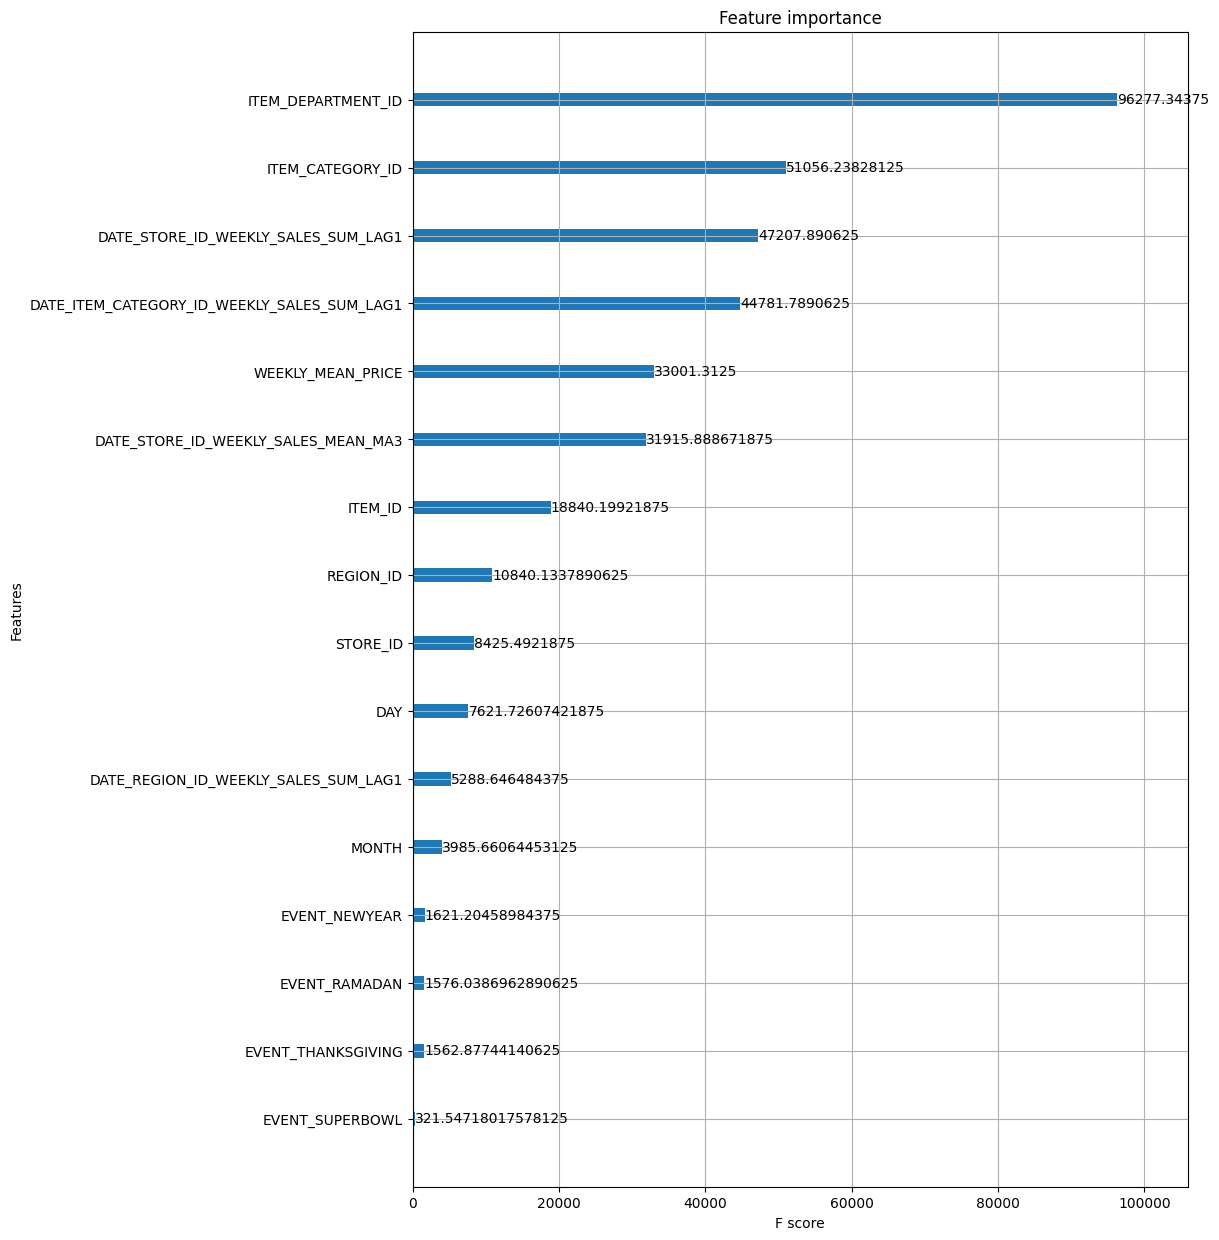

In [392]:
importance = model.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax);

In [393]:
Y_valida_pred = model.predict(X_valida)

rmse_valida = np.sqrt(mean_squared_error(Y_valida, Y_valida_pred))
rmse_valida

4.170585817226658

In [394]:
predictions = model.predict(X_test)
X_test["SALES_PREDICTED"] = np.clip(predictions, 0, 15)

In [395]:
last_trained_model = pickle.load(open("./data_dsmarket/modelos/{}_{}.dat".format(model_name, t), "rb"))

In [396]:
Y_test

ID
ACCESORIES_1_001_BOS_1      2
ACCESORIES_1_001_BOS_2      3
ACCESORIES_1_001_BOS_3      2
ACCESORIES_1_001_NYC_1      2
ACCESORIES_1_001_NYC_2      6
                           ..
SUPERMARKET_3_827_NYC_3    15
SUPERMARKET_3_827_NYC_4    15
SUPERMARKET_3_827_PHI_1    15
SUPERMARKET_3_827_PHI_2    12
SUPERMARKET_3_827_PHI_3     0
Name: WEEKLY_SALES, Length: 121960, dtype: int64

In [397]:
predictions

array([2.1444213, 2.9345787, 3.3004913, ..., 9.604727 , 8.336303 ,
       8.550122 ], dtype=float32)

In [398]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(Y_test, predictions, squared=False)

In [399]:
rms

4.139157369184696

In [400]:
len(predictions)

121960

In [401]:
predictions

array([2.1444213, 2.9345787, 3.3004913, ..., 9.604727 , 8.336303 ,
       8.550122 ], dtype=float32)

In [402]:
predictions_df = pd.DataFrame(predictions)

In [403]:
predictions_df['ID'] = X_test.index

In [404]:
full_df[full_df["DATE"].isin(test_index)]

,DATE,WEEKLY_SALES,WEEKLY_MEAN_PRICE,EVENT_NEWYEAR,EVENT_NONE,EVENT_SUPERBOWL,EVENT_THANKSGIVING,EVENT_RAMADAN,ITEM_ID,ITEM_CATEGORY_ID,ITEM_DEPARTMENT_ID,REGION_ID,STORE_ID,MONTH,DAY,DATE_STORE_ID_WEEKLY_SALES_MEAN_MA3,DATE_STORE_ID_WEEKLY_SALES_SUM_LAG1,DATE_REGION_ID_WEEKLY_SALES_SUM_LAG1,DATE_ITEM_CATEGORY_ID_WEEKLY_SALES_SUM_LAG1
ID,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_001_BOS_1,2016-04-03,2,10.9858,False,False,False,False,False,0.0,0.0,0.0,0.0,7.0,4,3,4.754127,14159.0,46457.0,19960.0
ACCESORIES_1_001_BOS_2,2016-04-03,3,10.9858,False,False,False,False,False,0.0,0.0,0.0,0.0,6.0,4,3,5.535585,16789.0,46457.0,19960.0
ACCESORIES_1_001_BOS_3,2016-04-03,2,10.9858,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,4,3,5.191210,15509.0,46457.0,19960.0
ACCESORIES_1_001_NYC_1,2016-04-03,2,10.9858,False,False,False,False,False,0.0,0.0,0.0,1.0,2.0,4,3,6.172188,18671.0,75310.0,19960.0
ACCESORIES_1_001_NYC_2,2016-04-03,6,10.9858,False,False,False,False,False,0.0,0.0,0.0,1.0,3.0,4,3,6.207937,20008.0,75310.0,19960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827_NYC_3,2016-04-24,15,1.2000,False,False,False,False,False,3048.0,2.0,6.0,1.0,8.0,4,24,7.496010,22562.0,75706.0,106835.0
SUPERMARKET_3_827_NYC_4,2016-04-24,15,1.2000,False,False,False,False,False,3048.0,2.0,6.0,1.0,1.0,4,24,4.732809,14195.0,75706.0,106835.0
SUPERMARKET_3_827_PHI_1,2016-04-24,15,1.2000,False,False,False,False,False,3048.0,2.0,6.0,2.0,4.0,4,24,6.147808,18536.0,53361.0,106835.0


In [405]:
test_dates = full_df[full_df["DATE"].isin(test_index)]

In [406]:
test_dates.reset_index(inplace=True)

In [407]:
predictions_df['DATE'] = test_dates['DATE']

In [408]:
predictions_df.set_index('DATE', inplace=True)
predictions_df

,0,ID
DATE,,
2016-04-03,2.144421,ACCESORIES_1_001_BOS_1
2016-04-03,2.934579,ACCESORIES_1_001_BOS_2
2016-04-03,3.300491,ACCESORIES_1_001_BOS_3
2016-04-03,4.186408,ACCESORIES_1_001_NYC_1
2016-04-03,4.026161,ACCESORIES_1_001_NYC_2
...,...,...
2016-04-24,9.104315,SUPERMARKET_3_827_NYC_3
2016-04-24,4.927455,SUPERMARKET_3_827_NYC_4
2016-04-24,9.604727,SUPERMARKET_3_827_PHI_1


In [409]:
predictions_df.rename(columns={0: "PREDICTED_SALES"}, inplace=True)

In [410]:
predictions_df

,PREDICTED_SALES,ID
DATE,,
2016-04-03,2.144421,ACCESORIES_1_001_BOS_1
2016-04-03,2.934579,ACCESORIES_1_001_BOS_2
2016-04-03,3.300491,ACCESORIES_1_001_BOS_3
2016-04-03,4.186408,ACCESORIES_1_001_NYC_1
2016-04-03,4.026161,ACCESORIES_1_001_NYC_2
...,...,...
2016-04-24,9.104315,SUPERMARKET_3_827_NYC_3
2016-04-24,4.927455,SUPERMARKET_3_827_NYC_4
2016-04-24,9.604727,SUPERMARKET_3_827_PHI_1


In [411]:
last_months = sorted(list(full_df["DATE"].unique()))[-12:]
last_months_df = full_df[full_df["DATE"].isin(last_months)]

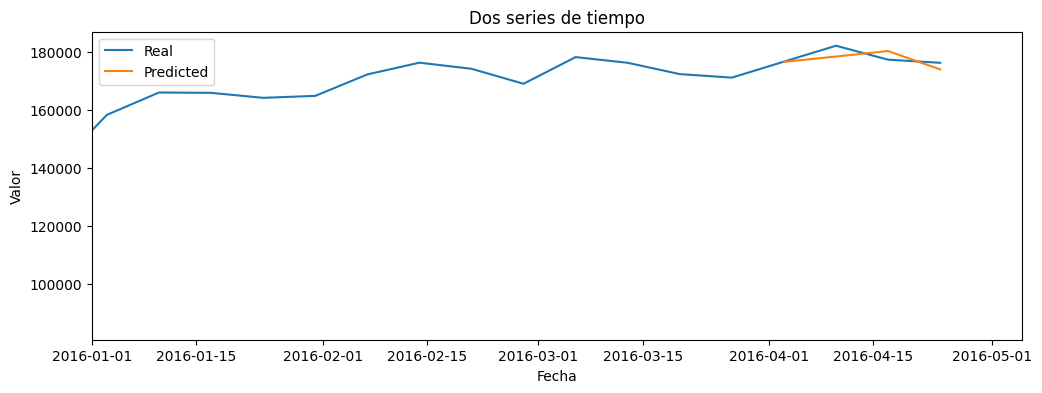

In [412]:
plt.figure(figsize = (12, 4))
# Plotear ambas series en una misma gráfica
plt.plot(full_df['DATE'].unique(), full_df.groupby('DATE')['WEEKLY_SALES'].sum(), label='Real')
plt.plot(predictions_df.index.unique(), predictions_df.groupby('DATE')["PREDICTED_SALES"].sum(), label='Predicted')

# Configurar la gráfica
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Dos series de tiempo')
plt.legend()
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2016-05-5'))
#plt.ylim(0, 15)

# Mostrar la gráfica
plt.show()